# **ABT 182 - Lab 3 Demo: Sentinel-2 Image Processing**

## **Working with Multispectral Satellite Imagery**

This demo notebook demonstrates how to:
- Open Sentinel-2 GeoTIFF files using rasterio
- Extract and visualize RGB composites
- Create false-color composites
- Calculate and visualize vegetation indices (NDVI)
- Use NumPy arrays, loops, and conditional statements for raster analysis

**Data:** Sentinel-2 multispectral image with 12 reflectance bands (0-1 range)

In [15]:
# Import required libraries
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os

# Enable inline plotting for Jupyter/Colab
%matplotlib inline

# Create Images directory if it doesn't exist
images_dir = 'Images'
os.makedirs(images_dir, exist_ok=True)
print(f"Images will be saved to: {os.path.abspath(images_dir)}")

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Rasterio version: {rasterio.__version__}")

Images will be saved to: c:\mnarimani\1-UCDavis\9-Github\ABT182_Advance_GIS_UCDavis\code\colab\Week3\Mohammadreza_Lab_Demo\Images
Libraries imported successfully!
NumPy version: 1.26.4
Rasterio version: 1.3.10


## Step 1: Open the Sentinel-2 Image with Rasterio

We'll open the GeoTIFF file and examine its properties (number of bands, dimensions, CRS, etc.)

In [16]:
# Path to the Sentinel-2 image
# If using Google Colab, mount Drive first and adjust path accordingly
# image_path = '/content/drive/MyDrive/ABT182/Data_Small_Volume/Sentinel2_Export.tif'

# For local file - relative path from notebook location
# Notebook is in: Week3/Mohammadreza_Lab_Demo/
# Data is in: Week3/Data_Small_Volume/
image_path = '../Data_Small_Volume/Sentinel2_Export.tif'

# Open the raster file
with rasterio.open(image_path) as src:
    # Get image properties
    print("Image Properties:")
    print("=" * 50)
    print(f"Number of bands: {src.count}")
    print(f"Image dimensions (width, height): {src.width} x {src.height}")
    print(f"Coordinate Reference System (CRS): {src.crs}")
    print(f"Data type: {src.dtypes[0]}")
    print(f"NoData value: {src.nodata}")
    
    # Get the transform (geospatial information)
    print(f"\nTransform (affine):")
    print(src.transform)
    
    # Read all bands into a NumPy array
    # Rasterio reads bands as (bands, rows, columns)
    all_bands = src.read()
    print(f"\nArray shape: {all_bands.shape}")
    print(f"Array dtype: {all_bands.dtype}")
    
    # Calculate statistics on valid (non-NaN) pixels only
    valid_mask = ~np.isnan(all_bands)
    if np.any(valid_mask):
        valid_data = all_bands[valid_mask]
        print(f"Value range (valid pixels): {valid_data.min():.3f} to {valid_data.max():.3f}")
        print(f"Number of NaN pixels: {np.sum(np.isnan(all_bands)):,}")
        print(f"Number of valid pixels: {np.sum(valid_mask):,}")
    else:
        print("Warning: All pixels are NaN!")

Image Properties:
Number of bands: 26
Image dimensions (width, height): 340 x 267
Coordinate Reference System (CRS): EPSG:4326
Data type: float32
NoData value: None

Transform (affine):
| 0.00, 0.00,-121.70|
| 0.00,-0.00, 38.52|
| 0.00, 0.00, 1.00|

Array shape: (26, 267, 340)
Array dtype: float32
Value range (valid pixels): 0.000 to 0.495
Number of NaN pixels: 237,528
Number of valid pixels: 2,122,752


## Step 2: Extract Individual Bands

Extract the RGB and NIR bands for visualization and analysis.

In [17]:
# Extract RGB bands (Note: band indices are 1-based in rasterio, but 0-based in arrays)
# Band 2 = Blue, Band 3 = Green, Band 4 = Red
blue_band = all_bands[1]  # Band 2 (index 1)
green_band = all_bands[2]  # Band 3 (index 2)
red_band = all_bands[3]    # Band 4 (index 3)
nir_band = all_bands[7]    # Band 8 (index 7) - Near Infrared

print("Band extraction complete!")

Band extraction complete!


## Step 3: Array Slicing and Cropping (Week 3 Concept)

Learn how to extract and visualize specific regions using array slicing. This demonstrates Week 3 slicing concepts with real images!

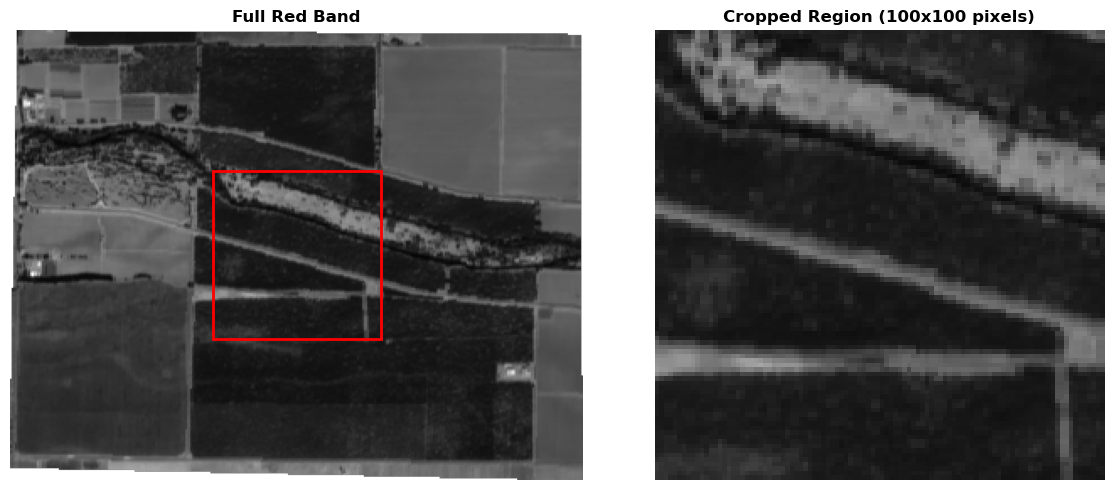

✅ Array slicing: Cropped and visualized a region from the image!
✅ Image saved: Images\Step3_ArraySlicing_CroppedRegion.png


In [18]:
# Example 1: Crop a region from the red band and visualize it
# Extract a 100x100 pixel region from center of image
center_row, center_col = red_band.shape[0] // 2, red_band.shape[1] // 2
cropped_region = red_band[center_row-50:center_row+50, center_col-50:center_col+50]

# Visualize the cropped region
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(red_band, cmap='gray', vmin=0, vmax=0.35)
axes[0].set_title('Full Red Band', fontsize=12, fontweight='bold')
axes[0].axis('off')
# Draw rectangle showing cropped area
from matplotlib.patches import Rectangle
rect = Rectangle((center_col-50, center_row-50), 100, 100, 
                 linewidth=2, edgecolor='red', facecolor='none')
axes[0].add_patch(rect)

axes[1].imshow(cropped_region, cmap='gray', vmin=0, vmax=0.35)
axes[1].set_title('Cropped Region (100x100 pixels)', fontsize=12, fontweight='bold')
axes[1].axis('off')
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'Step3_ArraySlicing_CroppedRegion.png'), dpi=150, bbox_inches='tight')
plt.show()

print("✅ Array slicing: Cropped and visualized a region from the image!")
print(f"✅ Image saved: {os.path.join(images_dir, 'Step3_ArraySlicing_CroppedRegion.png')}")

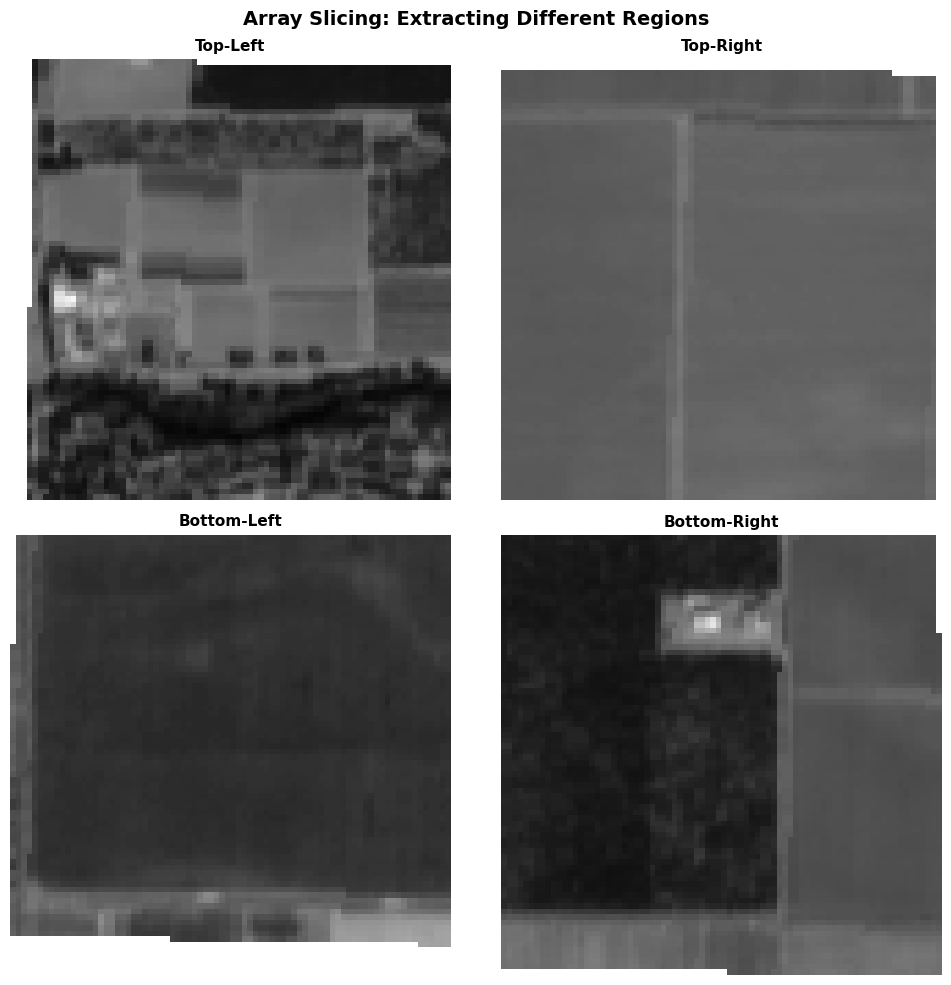

✅ Array slicing: Extracted and compared different regions!
✅ Image saved: Images\Step3_ArraySlicing_FourCorners.png


In [19]:
# Example 2: Extract different regions and compare them
# Top-left, top-right, bottom-left, bottom-right corners
h, w = red_band.shape[0], red_band.shape[1]
region_size = 80

regions = {
    'Top-Left': red_band[0:region_size, 0:region_size],
    'Top-Right': red_band[0:region_size, w-region_size:w],
    'Bottom-Left': red_band[h-region_size:h, 0:region_size],
    'Bottom-Right': red_band[h-region_size:h, w-region_size:w]
}

# Visualize all four corners
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for idx, (name, region) in enumerate(regions.items()):
    row, col = idx // 2, idx % 2
    axes[row, col].imshow(region, cmap='gray', vmin=0, vmax=0.35)
    axes[row, col].set_title(name, fontsize=11, fontweight='bold')
    axes[row, col].axis('off')
plt.suptitle('Array Slicing: Extracting Different Regions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'Step3_ArraySlicing_FourCorners.png'), dpi=150, bbox_inches='tight')
plt.show()

print("✅ Array slicing: Extracted and compared different regions!")
print(f"✅ Image saved: {os.path.join(images_dir, 'Step3_ArraySlicing_FourCorners.png')}")

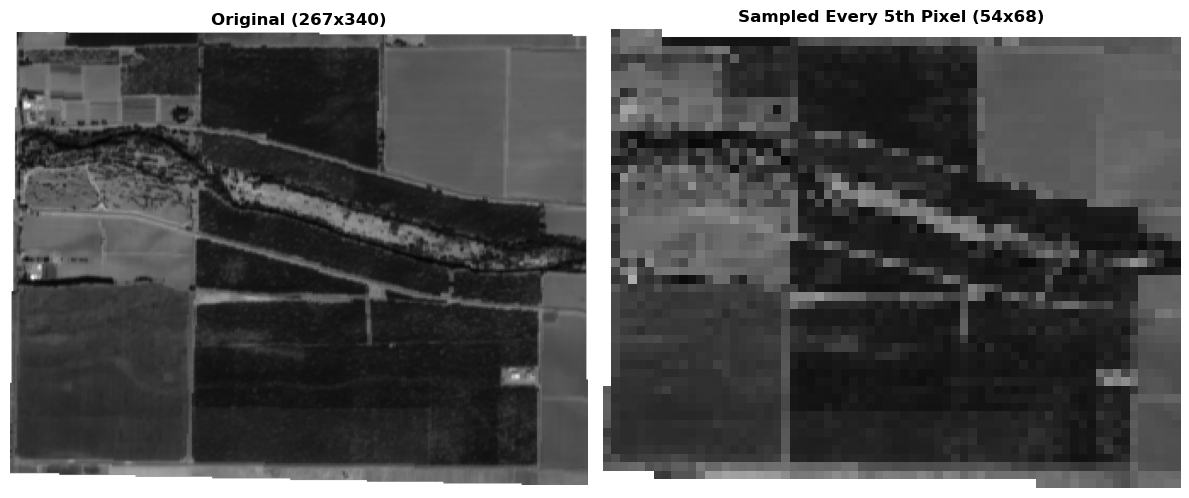

✅ Step slicing: Downsampled image from (267, 340) to (54, 68)!
✅ Image saved: Images\Step3_ArraySlicing_StepSlicing.png


In [20]:
# Example 3: Step slicing - sample every Nth pixel (downsampling)
# This is useful for quick previews of large images
step = 5  # Sample every 5th pixel
sampled_band = red_band[::step, ::step]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(red_band, cmap='gray', vmin=0, vmax=0.35)
axes[0].set_title(f'Original ({red_band.shape[0]}x{red_band.shape[1]})', fontsize=12, fontweight='bold')
axes[0].axis('off')

axes[1].imshow(sampled_band, cmap='gray', vmin=0, vmax=0.35)
axes[1].set_title(f'Sampled Every {step}th Pixel ({sampled_band.shape[0]}x{sampled_band.shape[1]})', 
                  fontsize=12, fontweight='bold')
axes[1].axis('off')
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'Step3_ArraySlicing_StepSlicing.png'), dpi=150, bbox_inches='tight')
plt.show()

print(f"✅ Step slicing: Downsampled image from {red_band.shape} to {sampled_band.shape}!")
print(f"✅ Image saved: {os.path.join(images_dir, 'Step3_ArraySlicing_StepSlicing.png')}")

## Step 4: Display RGB True-Color Composite

Create a natural-color RGB composite. Note: matplotlib's `imshow()` expects (rows, cols, bands) format, so we need to stack bands and transpose.

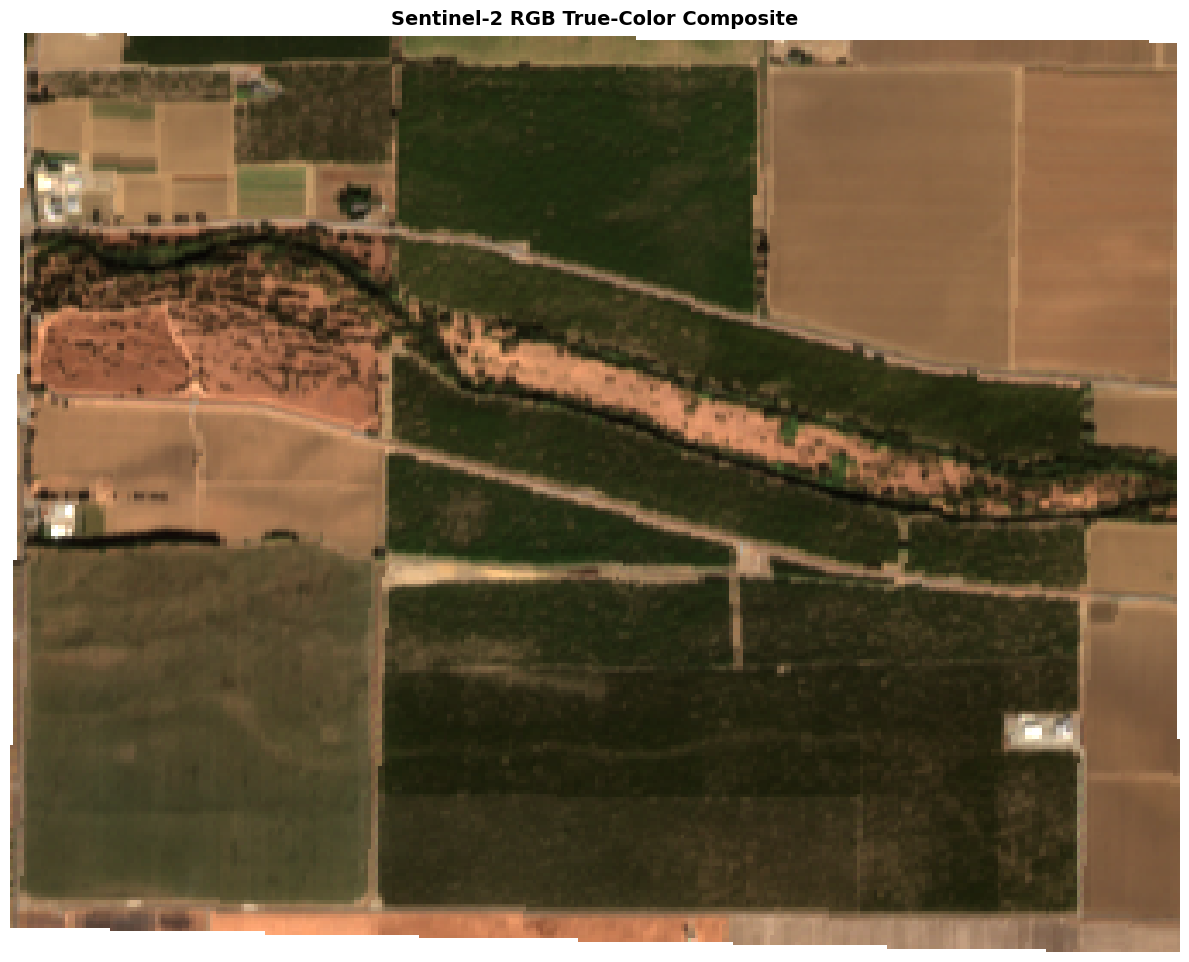

RGB composite displayed!
✅ Image saved: Images\Step4_RGB_TrueColorComposite.png


In [21]:
# Stack RGB bands: rasterio format is (bands, rows, cols), matplotlib needs (rows, cols, bands)
rgb_composite = np.stack([red_band, green_band, blue_band], axis=0)  # Stack along first axis
rgb_composite = np.transpose(rgb_composite, (1, 2, 0))  # Transpose to (rows, cols, bands)

# Apply subtle brightness enhancement
rgb_stretched = np.clip(rgb_composite * 4.5, 0, 1)  # Moderate stretch

# Display the RGB composite
plt.figure(figsize=(12, 10))
plt.imshow(rgb_stretched)
plt.title('Sentinel-2 RGB True-Color Composite', fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'Step4_RGB_TrueColorComposite.png'), dpi=150, bbox_inches='tight')
plt.show()

print("RGB composite displayed!")
print(f"✅ Image saved: {os.path.join(images_dir, 'Step4_RGB_TrueColorComposite.png')}")

## Step 5: Display Individual Bands (Using Loops)

Use a for loop to display all 12 bands efficiently. This demonstrates Week 3 loop concepts!

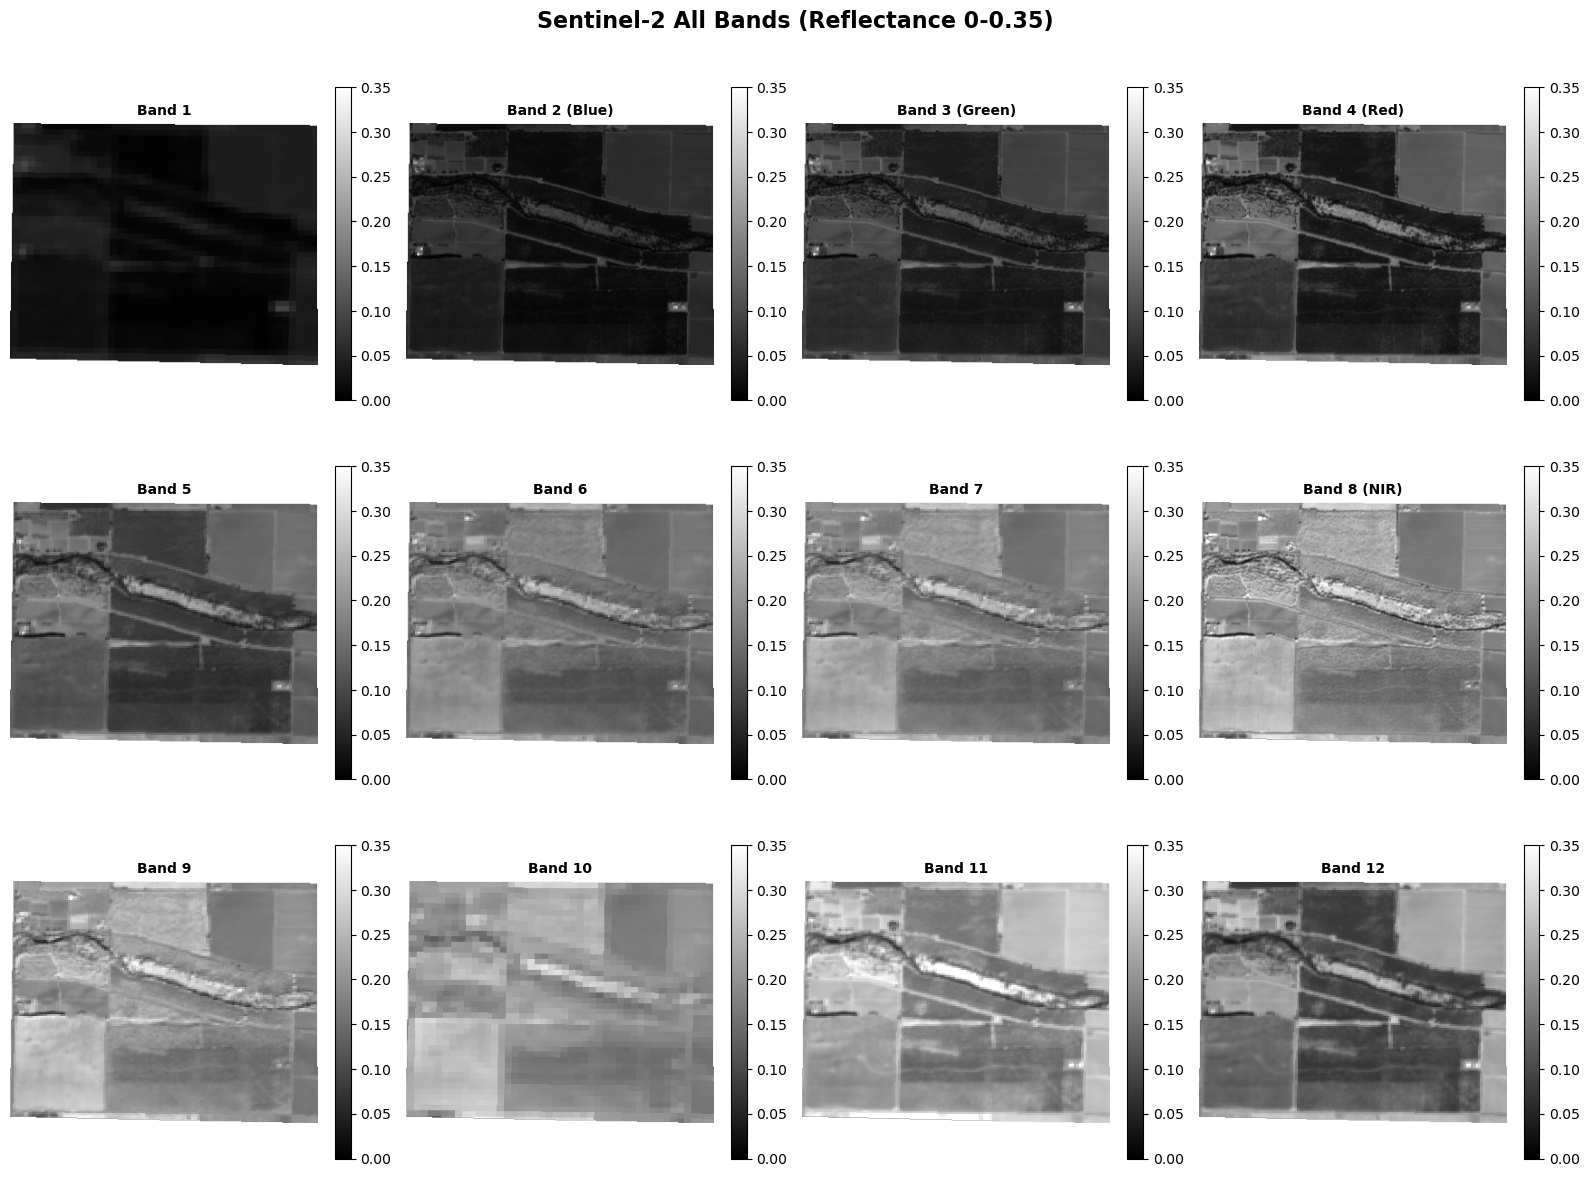

All 12 bands displayed using a for loop (range: 0-0.35)!
✅ Image saved: Images\Step5_AllBands_ForLoop_0to035.png


In [22]:
# Band names for labeling
band_names = ['Band 1', 'Band 2 (Blue)', 'Band 3 (Green)', 'Band 4 (Red)', 
              'Band 5', 'Band 6', 'Band 7', 'Band 8 (NIR)', 
              'Band 9', 'Band 10', 'Band 11', 'Band 12']

# Create a figure with subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()  # Flatten to 1D array for easier indexing

# Use the same range for all bands (0 to 0.35) for consistent comparison
vmin = 0
vmax = 0.35

# Loop through bands 1-12 (indices 0-11) - Week 3: For loops!
for i in range(12):
    band_data = all_bands[i]
    
    # Display each band with grayscale colormap using the same range
    im = axes[i].imshow(band_data, cmap='gray', vmin=vmin, vmax=vmax)
    axes[i].set_title(band_names[i], fontsize=10, fontweight='bold')
    axes[i].axis('off')
    plt.colorbar(im, ax=axes[i], fraction=0.046)

plt.suptitle('Sentinel-2 All Bands (Reflectance 0-0.35)', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'Step5_AllBands_ForLoop_0to035.png'), dpi=150, bbox_inches='tight')
plt.show()

print("All 12 bands displayed using a for loop (range: 0-0.35)!")
print(f"✅ Image saved: {os.path.join(images_dir, 'Step5_AllBands_ForLoop_0to035.png')}")

## Step 6: Create False-Color Composite (NIR-Red-Green)

False-color composites help visualize vegetation. Healthy vegetation appears red because it reflects strongly in NIR.

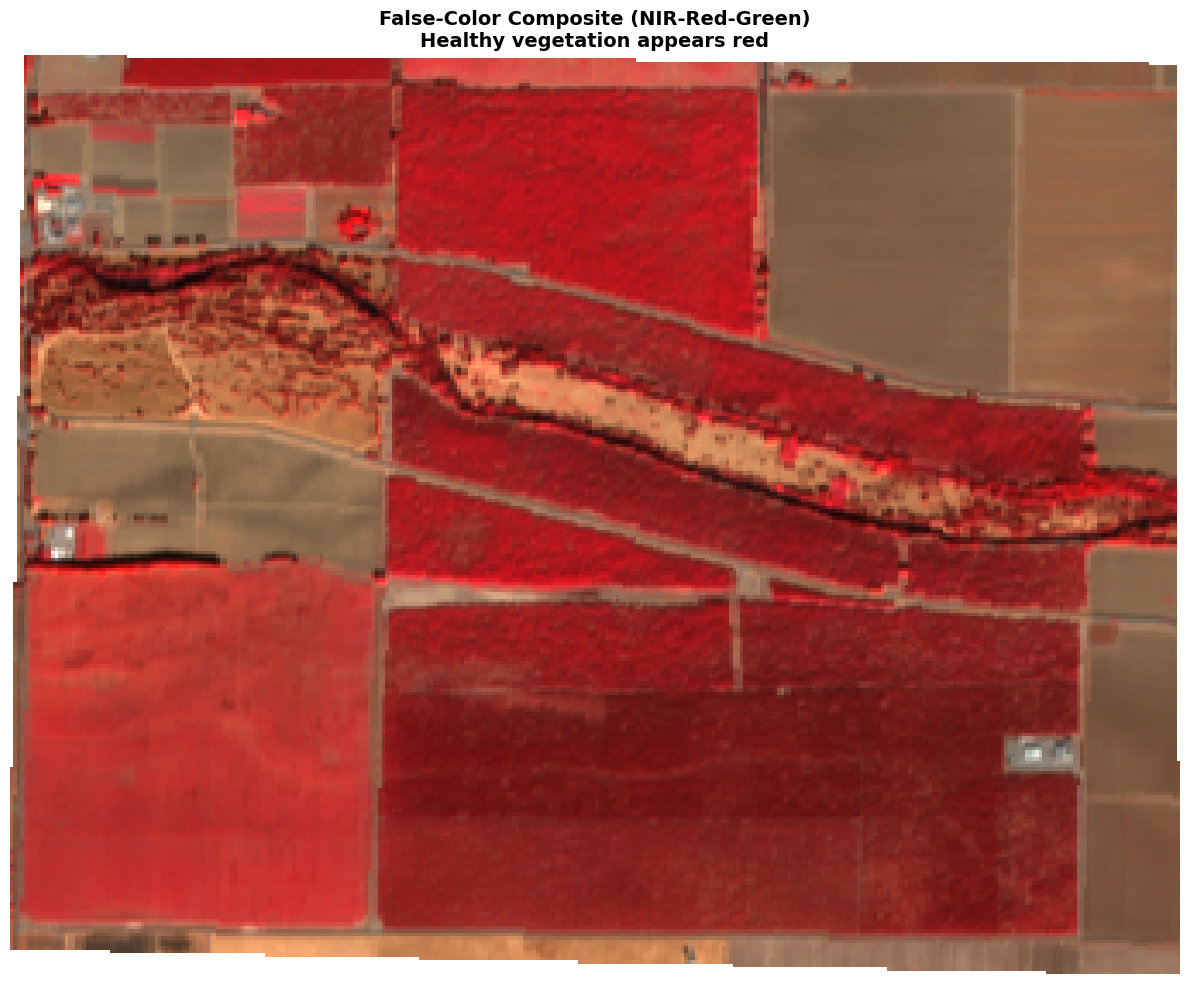

False-color composite displayed!
✅ Image saved: Images\Step6_FalseColorComposite_NIR_Red_Green.png


In [23]:
# Create false-color composite: NIR, Red, Green
# This is useful for vegetation analysis
false_color = np.stack([nir_band, red_band, green_band], axis=0)
false_color = np.transpose(false_color, (1, 2, 0))

# Apply subtle brightness enhancement (same as RGB)
false_color_stretched = np.clip(false_color * 3.0, 0, 1)  # Moderate stretch

# Display false-color composite
plt.figure(figsize=(12, 10))
plt.imshow(false_color_stretched)
plt.title('False-Color Composite (NIR-Red-Green)\nHealthy vegetation appears red', 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'Step6_FalseColorComposite_NIR_Red_Green.png'), dpi=150, bbox_inches='tight')
plt.show()

print("False-color composite displayed!")
print(f"✅ Image saved: {os.path.join(images_dir, 'Step6_FalseColorComposite_NIR_Red_Green.png')}")

## Step 7: Calculate NDVI (Normalized Difference Vegetation Index)

NDVI = (NIR - Red) / (NIR + Red)

NDVI values range from -1 to +1:
- **High values (0.3-1.0)**: Dense, healthy vegetation
- **Low values (0-0.3)**: Sparse vegetation, soil, or water
- **Negative values**: Water, clouds, or shadows

We'll use NumPy array operations and conditional statements to calculate and classify NDVI.

In [24]:
# Calculate NDVI using NumPy array operations
# NDVI = (NIR - Red) / (NIR + Red)

# Avoid division by zero by adding a small epsilon
denominator = nir_band + red_band
epsilon = 1e-10  # Small value to prevent division by zero
ndvi = (nir_band - red_band) / (denominator + epsilon)

# Clip NDVI to valid range (-1 to 1)
ndvi = np.clip(ndvi, -1, 1)

print("NDVI calculated!")
# Calculate statistics on valid (non-NaN) pixels only
valid_ndvi = ndvi[~np.isnan(ndvi)]
if len(valid_ndvi) > 0:
    print(f"NDVI statistics (valid pixels only):")
    print(f"  Minimum: {valid_ndvi.min():.3f}")
    print(f"  Maximum: {valid_ndvi.max():.3f}")
    print(f"  Mean: {valid_ndvi.mean():.3f}")
    print(f"  Standard deviation: {valid_ndvi.std():.3f}")
    print(f"  Valid pixels: {len(valid_ndvi):,}/{ndvi.size:,} ({100*len(valid_ndvi)/ndvi.size:.1f}%)")
else:
    print("Warning: All NDVI values are NaN!")

NDVI calculated!
NDVI statistics (valid pixels only):
  Minimum: -0.020
  Maximum: 0.855
  Mean: 0.443
  Standard deviation: 0.220
  Valid pixels: 88,448/90,780 (97.4%)


## Step 8: Visualize NDVI with Colormap

Display NDVI using a vegetation-friendly colormap (RdYlGn - Red-Yellow-Green).

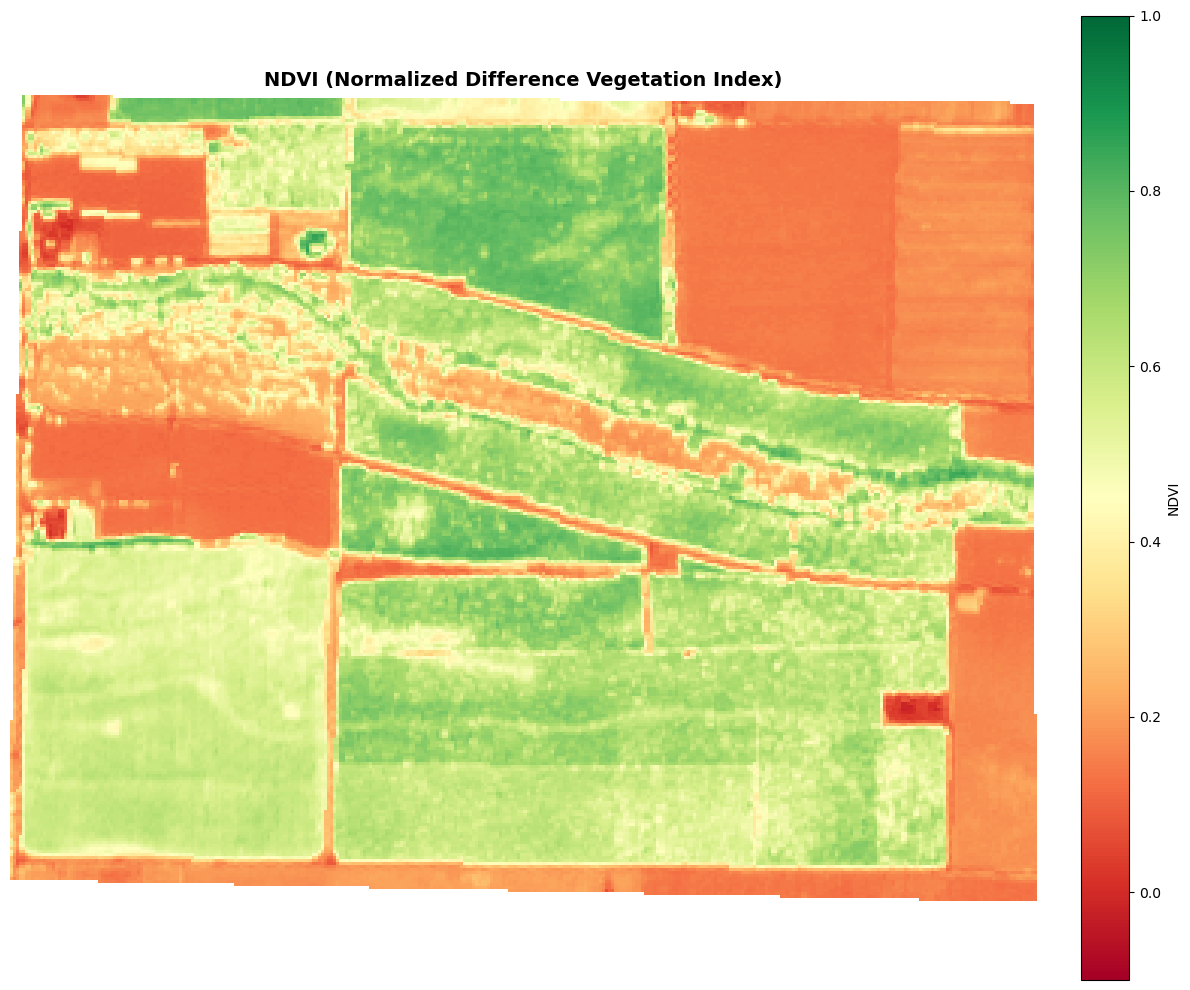

NDVI visualization complete!
✅ Image saved: Images\Step8_NDVI_Visualization.png


In [25]:
# Display NDVI with colormap
plt.figure(figsize=(12, 10))
im = plt.imshow(ndvi, cmap='RdYlGn', vmin=-0.1, vmax=1)
plt.title('NDVI (Normalized Difference Vegetation Index)', fontsize=14, fontweight='bold')
plt.colorbar(im, label='NDVI', fraction=0.046, pad=0.04)
plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'Step8_NDVI_Visualization.png'), dpi=150, bbox_inches='tight')
plt.show()

print("NDVI visualization complete!")
print(f"✅ Image saved: {os.path.join(images_dir, 'Step8_NDVI_Visualization.png')}")

## Step 9: Classify NDVI Using Conditional Statements

Use conditional statements (if/else logic with NumPy) to classify pixels into vegetation categories.

In [26]:
# Create a classification array using NumPy conditional operations
# This demonstrates Week 3 conditional statement concepts with arrays

# Initialize with NaN values (will be used for NoData)
ndvi_classified = np.full_like(ndvi, np.nan, dtype=np.float32)

# Create mask for valid (non-NaN) NDVI values
valid_mask = ~np.isnan(ndvi)

# Classify pixels based on NDVI values (only for valid pixels)
# Using NumPy's where() function (vectorized conditional)
ndvi_classified = np.where((valid_mask) & (ndvi < 0), 0, ndvi_classified)  # Water/Clouds (negative NDVI)
ndvi_classified = np.where((valid_mask) & (ndvi >= 0) & (ndvi < 0.2), 1, ndvi_classified)  # Soil/Bare
ndvi_classified = np.where((valid_mask) & (ndvi >= 0.2) & (ndvi < 0.4), 2, ndvi_classified)  # Sparse vegetation
ndvi_classified = np.where((valid_mask) & (ndvi >= 0.4) & (ndvi < 0.6), 3, ndvi_classified)  # Moderate vegetation
ndvi_classified = np.where((valid_mask) & (ndvi >= 0.6), 4, ndvi_classified)  # Dense vegetation

# Count pixels in each class using a loop
class_names = ['Water/Cloud/NaN', 'Soil/Bare', 'Sparse Veg', 'Moderate Veg', 'Dense Veg']
class_counts = []

# Count NaN pixels separately
nan_count = np.sum(np.isnan(ndvi_classified))
nan_percentage = (nan_count / ndvi.size) * 100
print(f"Water/Cloud/NaN (NoData): {nan_count:,} pixels ({nan_percentage:.2f}%)")

# Count valid classification classes
for i in range(5):
    count = np.sum(ndvi_classified == i)
    class_counts.append(count)
    percentage = (count / ndvi.size) * 100
    print(f"{class_names[i]}: {count:,} pixels ({percentage:.2f}%)")

print(f"\nTotal pixels: {ndvi.size:,}")

Water/Cloud/NaN (NoData): 2,332 pixels (2.57%)
Water/Cloud/NaN: 19 pixels (0.02%)
Soil/Bare: 23,669 pixels (26.07%)
Sparse Veg: 11,523 pixels (12.69%)
Moderate Veg: 26,076 pixels (28.72%)
Dense Veg: 27,161 pixels (29.92%)

Total pixels: 90,780


## Step 10: Visualize NDVI Classification

Display the classified NDVI map with a custom colormap.

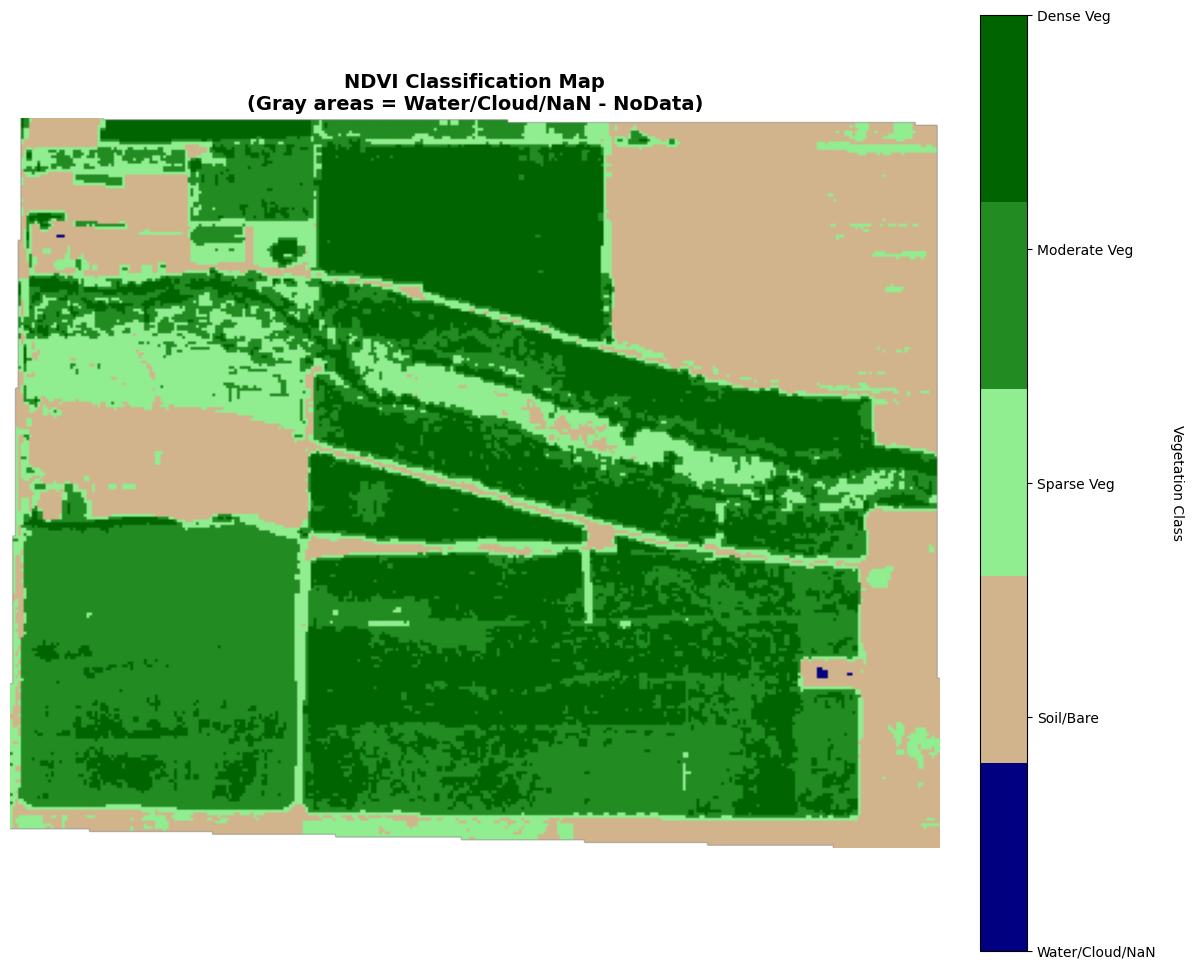

NDVI classification map displayed!
Note: Gray areas represent NaN/NoData values (Water/Cloud/NaN)
✅ Image saved: Images\Step10_NDVI_ClassificationMap.png


In [27]:
# Create custom colormap for classification
from matplotlib.colors import ListedColormap

# Colors for all 5 classes: Water/Cloud/NaN (blue), Soil/Bare (tan), Sparse Veg, Moderate Veg, Dense Veg
# Note: Class 0 (Water/Cloud/NaN) will be masked, but we include it for proper color mapping
colors = ['#000080', '#D2B48C', '#90EE90', '#228B22', '#006400']  # Blue, Tan, Light Green, Forest Green, Dark Green
cmap_classified = ListedColormap(colors)

# Display classified NDVI using masked array (NaN values will appear as gray/transparent)
plt.figure(figsize=(12, 10))
ndvi_masked = np.ma.masked_where(np.isnan(ndvi_classified), ndvi_classified)
im = plt.imshow(ndvi_masked, cmap=cmap_classified, vmin=0, vmax=4)
plt.title('NDVI Classification Map\n(Gray areas = Water/Cloud/NaN - NoData)', fontsize=14, fontweight='bold')
cbar = plt.colorbar(im, fraction=0.046, pad=0.04, ticks=[0, 1, 2, 3, 4])
cbar.set_ticklabels(class_names)
cbar.set_label('Vegetation Class', rotation=270, labelpad=20)
plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'Step10_NDVI_ClassificationMap.png'), dpi=150, bbox_inches='tight')
plt.show()

print("NDVI classification map displayed!")
print("Note: Gray areas represent NaN/NoData values (Water/Cloud/NaN)")
print(f"✅ Image saved: {os.path.join(images_dir, 'Step10_NDVI_ClassificationMap.png')}")

## Step 11: Side-by-Side Comparison

Compare RGB composite, NDVI, and classification in one figure.

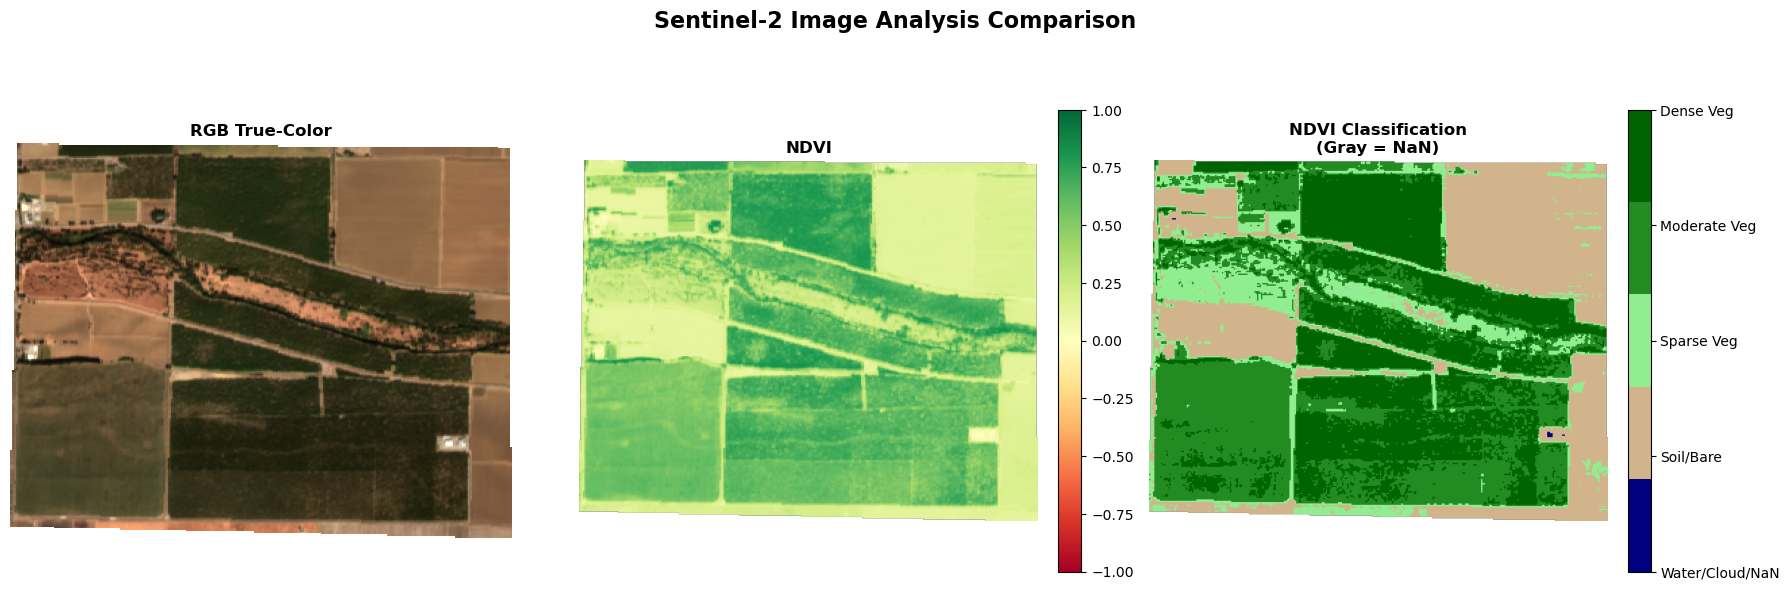

Comparison figure created!
✅ Image saved: Images\Step11_Comparison_RGB_NDVI_Classification.png


In [28]:
# Create a comparison figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# RGB Composite
axes[0].imshow(rgb_stretched)
axes[0].set_title('RGB True-Color', fontsize=12, fontweight='bold')
axes[0].axis('off')

# NDVI
im1 = axes[1].imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
axes[1].set_title('NDVI', fontsize=12, fontweight='bold')
axes[1].axis('off')
plt.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

# Classification (handle NaN values - will appear as gray/transparent)
ndvi_masked = np.ma.masked_where(np.isnan(ndvi_classified), ndvi_classified)
im2 = axes[2].imshow(ndvi_masked, cmap=cmap_classified, vmin=0, vmax=4)
axes[2].set_title('NDVI Classification\n(Gray = NaN)', fontsize=12, fontweight='bold')
axes[2].axis('off')
cbar2 = plt.colorbar(im2, ax=axes[2], fraction=0.046, pad=0.04, ticks=[0, 1, 2, 3, 4])
cbar2.set_ticklabels(class_names)

plt.suptitle('Sentinel-2 Image Analysis Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig(os.path.join(images_dir, 'Step11_Comparison_RGB_NDVI_Classification.png'), dpi=150, bbox_inches='tight')
plt.show()

print("Comparison figure created!")
print(f"✅ Image saved: {os.path.join(images_dir, 'Step11_Comparison_RGB_NDVI_Classification.png')}")

## Summary

This demo demonstrated:
- ✅ Opening GeoTIFF files with rasterio
- ✅ Extracting bands using NumPy array indexing
- ✅ **Array slicing and cropping** (Week 3 concept)
- ✅ Creating RGB and false-color composites
- ✅ Using **for loops** to display multiple bands
- ✅ Calculating NDVI using **NumPy array operations**
- ✅ Using **conditional statements** (np.where) for classification
- ✅ Visualizing results with matplotlib

**Key Week 3 Concepts Applied:**
- NumPy arrays for raster data
- Array slicing and indexing
- For loops for iterating through bands
- Conditional logic for pixel classification
- Array operations (addition, division, clipping)